In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle

from PatchTST_supervised.utils.metrics import metric, MAE, MAPE

In [2]:
def data_inverse(label_c, original_dimension, original_position, scaler): #original dimensino(2D) without the label_c column
    temp_matrix = np.full(original_dimension, 0, np.float32)
    temp_matrix = np.insert(temp_matrix, original_position, label_c, axis=1)
    return scaler.inverse_transform(temp_matrix)[:, original_position]

In [3]:



scaler_path = r'scaler\n225_index_pct_spec_s\n225_index_pct_spec_s_7_1.pkl'

metrics_path = r'results\n225_index_pct_spec_s_7_1_PatchTST_stock_custom_ftMS_sl7_ll2_pl1_dm128_nh4_el2_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0\metrics.npy'

pred_path = r'results\n225_index_pct_spec_s_7_1_PatchTST_stock_custom_ftMS_sl7_ll2_pl1_dm128_nh4_el2_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0\pred.npy'

true_path = r'results\n225_index_pct_spec_s_7_1_PatchTST_stock_custom_ftMS_sl7_ll2_pl1_dm128_nh4_el2_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0\true.npy'




#load scaler
scaler = None

with open(scaler_path, 'rb') as f:
    scaler = pickle.load(f)


n_column = (scaler.n_features_in_) - 1


metrics = np.load(metrics_path, allow_pickle=True)
print(metrics)

pred_raw = np.load(pred_path)
pred_raw = pred_raw.reshape((pred_raw.shape[0]))
pred = data_inverse(pred_raw, (pred_raw.shape[0], n_column), n_column, scaler)
print(pred_raw[:10])
print(pred[:10])
print(pred.shape)
print(pred_raw.shape)

true_raw = np.load(true_path)
true_raw = true_raw.reshape((true_raw.shape[0]))
true = data_inverse(true_raw, (true_raw.shape[0], n_column), n_column, scaler=scaler)
print(true_raw[:10]) 
print(true[:10])
print(true.shape)
print(true_raw.shape)



[0.050690867 0.005112455 0.071501434 0.028785635 0.002269355 0.19064254
 array([0.11370516], dtype=float32)]
[2.5211234 2.4892237 2.4488842 2.3758025 2.3817062 2.1847692 2.1796718
 2.10466   2.1531744 2.2081277]
[24098.098 23969.146 23806.076 23510.646 23534.512 22738.404 22717.799
 22414.566 22610.684 22832.83 ]
(512,)
(512,)
[2.490825  2.4433541 2.3655968 2.3746626 2.1482701 2.173948  2.0692194
 2.1379747 2.2101781 2.1649187]
[23975.62 23783.72 23469.39 23506.04 22590.86 22694.66 22271.3  22549.24
 22841.12 22658.16]
(512,)
(512,)


c:\Users\Vincent\.conda\envs\Pytorch_1_11\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [4]:
mae = MAE(pred, true)
mape = MAPE(pred, true)


In [5]:
print("MAE : {}".format(mae))
print("MAPE : %.10f"%(mape))

MAE : 204.9151611328125
MAPE : 0.0095732938


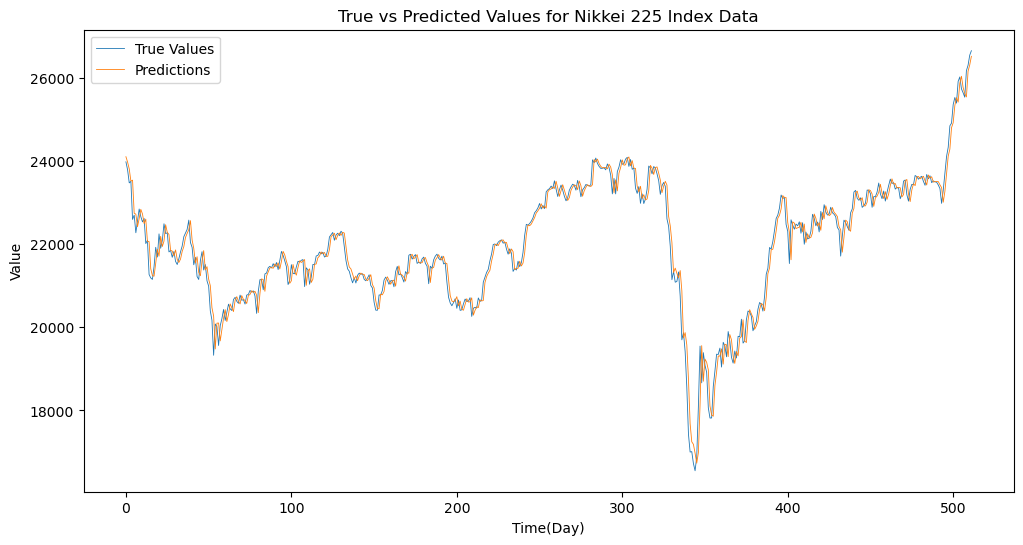

In [8]:
import matplotlib.pyplot as plt

time_axis = np.arange(len(pred))
plt.figure(figsize=(12, 6))

plt.plot(time_axis, true, label='True Values', linewidth=0.6)
plt.plot(time_axis, pred, label='Predictions', linewidth=0.6)

plt.xlabel('Time(Day)')
plt.ylabel('Value')
plt.title('True vs Predicted Values for Nikkei 225 Index Data')
plt.legend()

plt.show()

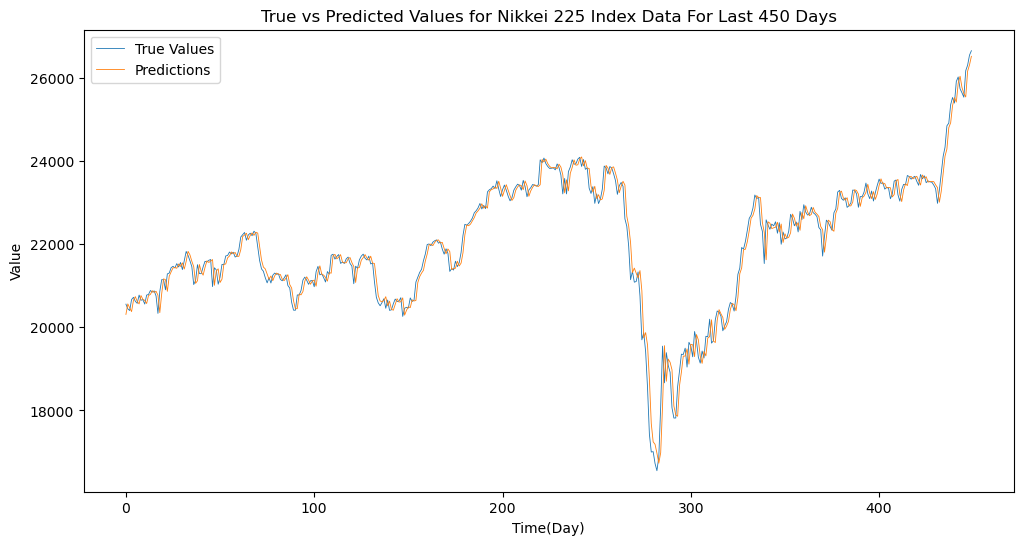

In [9]:
import matplotlib.pyplot as plt

last_value = 450


time_axis = np.arange(len(pred[-last_value:]))
plt.figure(figsize=(12, 6))

plt.plot(time_axis, true[-last_value:], label='True Values', linewidth=0.6)
plt.plot(time_axis, pred[-last_value:], label='Predictions', linewidth=0.6)

plt.xlabel('Time(Day)')
plt.ylabel('Value')
plt.title('True vs Predicted Values for Nikkei 225 Index Data For Last {} Days'.format(last_value))
plt.legend()

plt.show()